In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("uniport_candi_output_drift.csv")

In [4]:
df

compound         Target     UniProt ID  \
0      Cannabichromene  CHEMBL2096981  P34972 P21554   
1      Cannabichromene      CHEMBL352            NaN   
2      Cannabichromene      CHEMBL374            NaN   
3      Cannabichromene     CHEMBL5160         Q6RI86   
4      Cannabichromene      CHEMBL366            NaN   
...                ...            ...            ...   
15468     Cannflavin A     CHEMBL5896         O75164   
15469     Cannflavin A     CHEMBL5901         Q03114   
15470     Cannflavin A     CHEMBL6110         Q962Y6   
15471     Cannflavin A     CHEMBL4302         P08183   
15472     Cannflavin A   CHEMBL612600            NaN   

                                         Target Sequence     Score  \
0      MEECWVTEIANGSKDGLDSNPMKDYMILSGPQKTAVAVLCTLLGLL...  0.784459   
1                                                    NaN  0.640000   
2                                                    NaN  0.640000   
3      MKRSLRRVLRPEERKEVQGVVYRGVGKDMDCSKESFKVDIEGDMCR...  0.745256   
4                                                    NaN  0.580740   
...                                                  ...       ...   
15468  MASESETLNPSARIMTFYPTMEEFRNFSRYIAYIESQGAHRAGLAK...  0.470233   
15469  MQKYEKLEKIGEGTYGTVFKAKNRETHEIVALKRVRLDDDDEGVPS...  0.461867   
15470  MPPADGTSQWLRKTVDSAAVILFSKTTCPYCKKVKDVLAEAKIKHA...  0.461414   
15471  MDLEGDRNGGAKKKNFFKLNNKSEKDKKEKKPTVSVFSMFRYSNWL...  0.467500   
15472                                                NaN  0.450371   

      Most Similar Compound                           Compounds SMILES  \
0              CHEMBL422704      CCCCCc1cc(O)c2C=CC(C)(CCC=C(C)C)Oc2c1   
1              CHEMBL422704      CCCCCc1cc(O)c2C=CC(C)(CCC=C(C)C)Oc2c1   
2              CHEMBL422704      CCCCCc1cc(O)c2C=CC(C)(CCC=C(C)C)Oc2c1   
3              CHEMBL422704      CCCCCc1cc(O)c2C=CC(C)(CCC=C(C)C)Oc2c1   
4              CHEMBL558682   CCCCCc1cc(O)c2C=CC(C)(CCC(O)C(=C)C)Oc2c1   
...                     ...                                        ...   
15468          CHEMBL172350  COc1c(O)cc2OC(=CC(=O)c2c1O)c3ccc(O)c(O)c3   
15469          CHEMBL172350  COc1c(O)cc2OC(=CC(=O)c2c1O)c3ccc(O)c(O)c3   
15470          CHEMBL172350  COc1c(O)cc2OC(=CC(=O)c2c1O)c3ccc(O)c(O)c3   
15471           CHEMBL13473    COc1ccc2C(=O)C=C(Oc2c1)c3ccc(OC)c(OC)c3   
15472           CHEMBL13473    COc1ccc2C(=O)C=C(Oc2c1)c3ccc(OC)c(OC)c3   

       Compound FP2 Similarity  Compound Pharmacophore Similarity  \
0                     1.000000                                  0   
1                     1.000000                                  0   
2                     1.000000                                  0   
3                     1.000000                                  0   
4                     0.907407                                  0   
...                        ...                                ...   
15468                 0.703704                                  0   
15469                 0.703704                                  0   
15470                 0.703704                                  0   
15471                 0.703704                                  0   
15472                 0.703704                                  0   

       Assay Value Assay Type  \
0              NaN        NaN   
1              NaN        NaN   
2              NaN        NaN   
3              NaN        NaN   
4              NaN        NaN   
...            ...        ...   
15468      31622.8    Potency   
15469      40000.0       EC50   
15470      39810.7    Potency   
15471          NaN        NaN   
15472          NaN        NaN   

                                              Pathway_ID  Pathway_Name  \
0      R-HSA-500792: GPCR ligand binding, R-HSA-37279...           NaN   
1                                                    NaN           NaN   
2                                                    NaN           NaN   
3                                                    NaN           NaN   
4              

In [21]:
import re
def extract_pathway_id(pathway_string):
    # Use regular expression to extract the part before the colon
    match = re.match(r'(R-HSA-\d+):', pathway_string)
    if match:
        return match.group(1)
    else:
        return None


In [24]:
data = df

# Extract the columns 'compound' and 'Pathway_ID'
compounds_pathway_id = data[['compound', 'Pathway_ID']]

# Drop rows where 'Pathway_ID' is NaN
compounds_pathway_id_split = compounds_pathway_id.dropna().copy()

# Split the 'Pathway_ID' by ', ' and explode to separate rows
compounds_pathway_id_split['Pathway_ID'] = compounds_pathway_id_split['Pathway_ID'].str.split(', ')
compounds_pathway_id_split = compounds_pathway_id_split.explode('Pathway_ID').reset_index(drop=True)

# Save the transformed data to a new CSV file
compounds_pathway_id_split.to_csv('transformed_compounds_pathway_id.csv', index=False)

# Display the first few rows of the transformed dataframe
print(compounds_pathway_id_split.head())

          compound                                         Pathway_ID
0  Cannabichromene                  R-HSA-500792: GPCR ligand binding
1  Cannabichromene                    R-HSA-372790: Signaling by GPCR
2  Cannabichromene        R-HSA-418594: G alpha (i) signalling events
3  Cannabichromene           R-HSA-388396: GPCR downstream signalling
4  Cannabichromene  R-HSA-373076: Class A/1 (Rhodopsin-like recept...


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load the transformed CSV file
file_path = 'transformed_compounds_pathway_id.csv'  # replace with your file path
compounds_pathway_id_split = pd.read_csv(file_path)

# Clean the Pathway_ID column to keep only the relevant part
compounds_pathway_id_split['Pathway_ID'] = compounds_pathway_id_split['Pathway_ID'].str.split(':').str[0]
compounds_pathway_id_split = compounds_pathway_id_split[compounds_pathway_id_split['Pathway_ID'].str.startswith('R')]
# Save the transformed data to a new CSV file
compounds_pathway_id_split.to_csv('transformed_compounds_pathway_id_only.csv', index=False)

# Display the first few rows of the transformed dataframe
print(compounds_pathway_id_split.head())

          compound    Pathway_ID
0  Cannabichromene  R-HSA-500792
1  Cannabichromene  R-HSA-372790
2  Cannabichromene  R-HSA-418594
3  Cannabichromene  R-HSA-388396
4  Cannabichromene  R-HSA-373076


In [5]:
import pandas as pd

# Assuming your CSV file is loaded into a DataFrame 'df' with columns 'Compound' and 'Pathway_ID'
# Load the transformed CSV file
file_path = 'transformed_compounds_pathway_id_only.csv'  # replace with your file path
df = pd.read_csv(file_path)
# Group the DataFrame by 'Compound' and aggregate the 'Pathway_ID' column
aggregated_df = df.groupby('compound')['Pathway_ID'].apply(lambda x: '\t'.join(x)).reset_index()

# Rename the 'Pathway_ID' column to the compound name
aggregated_df = aggregated_df.rename(columns={'Pathway_ID': aggregated_df['compound'].values[0]})

# Drop the 'Compound' column
aggregated_df = aggregated_df.drop('compound', axis=1)

# Set the first row as the column names
aggregated_df.columns = aggregated_df.iloc[0]
aggregated_df = aggregated_df.iloc[1:]


In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a DataFrame 'df' with columns 'Compound' and 'Pathway_ID'
# Load the transformed CSV file
file_path = 'transformed_compounds_pathway_id_only.csv'  # replace with your file path
dfa = pd.read_csv(file_path)
# Create a binary matrix with compounds as rows and pathways as columns
pathway_matrix = pd.crosstab(dfa['Pathway_ID'], dfa['compound']).fillna(0)


# # Calculate the cosine similarity between each pair of compounds
compound_similarity = cosine_similarity(pathway_matrix.T)

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(compound_similarity, columns=pathway_matrix.columns, index=pathway_matrix.columns)

# Save the similarity matrix to a CSV file
similarity_df.to_csv('similarity_matrix_pathways.csv')




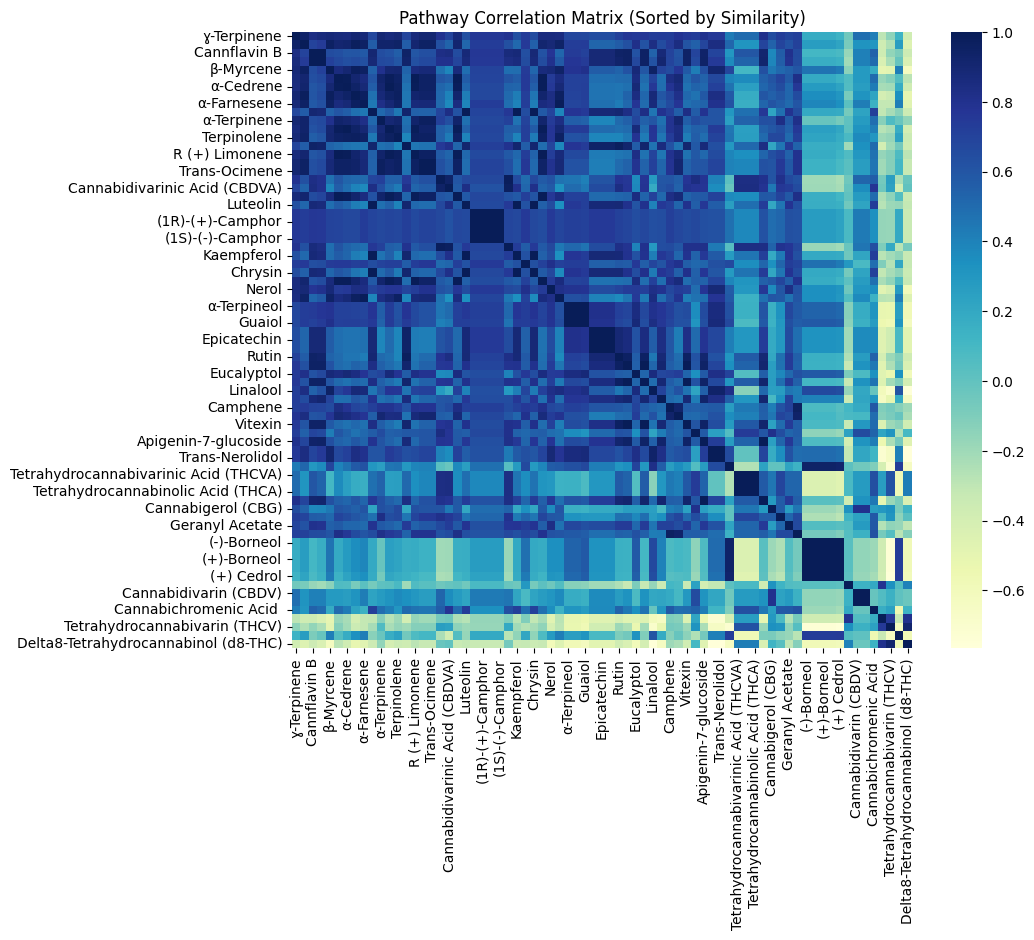

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_to_csv = "similarity_matrix_pathways.csv"
df = pd.read_csv(path_to_csv, index_col=0)

# Sort the similarity matrix based on the sum of similarities
sorted_df = df.reindex(df.sum().sort_values(ascending=False).index, axis=1)

# Create the heatmap with sorted data
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_df.corr(), annot=False, cmap="YlGnBu")
plt.title("Pathway Correlation Matrix (Sorted by Similarity)")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the heatmap
plt.savefig('pathway_correlation_matrix.png', bbox_inches='tight')
